In [1]:
import os
os.chdir("C:/Users/Sneha/Desktop/InternProject/brain_tumor_dataset/Brain_Tumor_Train_Test_Folders")

In [2]:
os.getcwd()

'C:\\Users\\Sneha\\Desktop\\InternProject\\brain_tumor_dataset\\Brain_Tumor_Train_Test_Folders'

# Importing Libraries

In [4]:
#import keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

# Initializing CNN model
Adding CNN and Dense Layers

In [5]:
model=Sequential()

In [6]:
#Add Convolution Layer
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))#1St parameter =no of features detectors 2nd& 3rd =Size of feature detector, 
#4th input image size,5 th parameter is channel for color=3 gray scale=1,6 th to avoid negative pixels we use activation function


In [7]:
#Add Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))#1parmeter=size of pooling matrix

In [8]:
#Add Flattening Layer
model.add(Flatten())

In [9]:
#Add Hidden Layer
model.add(Dense(units = 6,kernel_initializer="uniform",activation="relu",input_dim=11))

In [10]:
#Add Output layer
model.add(Dense(init="uniform",activation="sigmoid",output_dim=1))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [11]:
#Compile the model
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
x_train = train_datagen.flow_from_directory('train_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                     class_mode = 'binary')
x_test = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 180 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


# Training the model

In [35]:
history=model.fit_generator(x_train,
                         steps_per_epoch = 600,
                         epochs = 5,
                         validation_data = x_test,
                         validation_steps = 63)

Epoch 1/5
600/600 [==============================] - 191s 319ms/step - loss: 0.0469 - accuracy: 0.9890 - val_loss: 0.3161 - val_accuracy: 0.7808
Epoch 2/5
600/600 [==============================] - 211s 352ms/step - loss: 0.0373 - accuracy: 0.9913 - val_loss: 0.1743 - val_accuracy: 0.7808
Epoch 3/5
600/600 [==============================] - 197s 328ms/step - loss: 0.0303 - accuracy: 0.9934 - val_loss: 0.2441 - val_accuracy: 0.7808
Epoch 4/5
600/600 [==============================] - 206s 343ms/step - loss: 0.0226 - accuracy: 0.9963 - val_loss: 1.2096 - val_accuracy: 0.7808
Epoch 5/5
600/600 [==============================] - 187s 311ms/step - loss: 0.0190 - accuracy: 0.9968 - val_loss: 0.4877 - val_accuracy: 0.7945


# Saving the model

In [36]:
model.save("mymodel.h5")

In [37]:
from keras.models import load_model
import numpy as np
import cv2

In [38]:

# model = load_model('mymodel.h5')
# model.compile(loss='categorical_crossentropy',
#                       optimizer='adam',
#                       metrics=['accuracy'])

from skimage.transform import resize

def detect(frame):
    try:
        img = resize(frame,(64,64))
        img = np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img = img/255.0
        prediction = model.predict(img)
        print(prediction)
        prediction = model.predict_classes(img)
        print(prediction)
    except AttributeError:
        print("shape not found")

# Testing the model

In [39]:
frame=cv2.imread("C:/Users/Sneha/Desktop/InternProject/brain_tumor_dataset/Brain_Tumor_Train_Test_Folders/train_set/yes/y1.jpg")
data = detect(frame)

[[0.9999162]]
[[1]]


In [40]:
frame=cv2.imread("C:/Users/Sneha/Desktop/InternProject/brain_tumor_dataset/Brain_Tumor_Train_Test_Folders/train_set/no/N3.jpg")
data = detect(frame)

[[0.00064182]]
[[0]]


In [41]:
frame=cv2.imread("C:/Users/Sneha/Desktop/InternProject/brain_tumor_dataset/Brain_Tumor_Train_Test_Folders/test_set/yes/y167.jpg")
data = detect(frame)

[[0.9998754]]
[[1]]


In [42]:
frame=cv2.imread("C:/Users/Sneha/Desktop/InternProject/brain_tumor_dataset/Brain_Tumor_Train_Test_Folders/test_set/no/no.jpg")
data = detect(frame)

[[0.36261258]]
[[0]]


# Observation
When we are uploading
Train_set-yes image:it predicts 0.99 and it belongs to 1 class
Train_set-no image:it predicts 0.001 and it belongs to 0 class
Test_set-yes image:it predicts 0.99 and it belongs to 1 class
Test_set-no image:it predicts 0.36 and it belongs to 0 class

In [43]:
history = model.history.history

In [44]:
for key in history.keys():
    print(key)

val_loss
val_accuracy
loss
accuracy


In [45]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

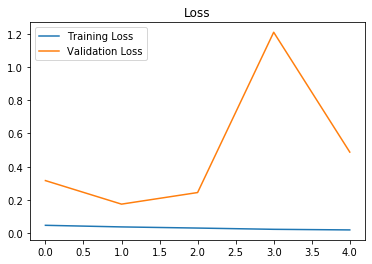

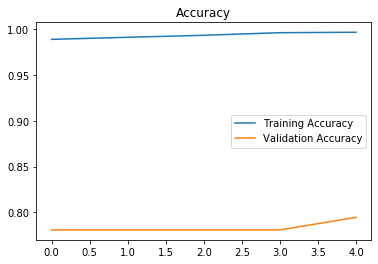

In [47]:
plot_metrics(history)

# Observation
By seeing the above graph we observed that the accuracy of training set is constant at 99% and the accuracy of testing set is constant at 79%.Similarly in loss of training set is low compared to testing loss and testing loss values are varying

# Conclusion
By using this Model:
Accuracy:99%,
val_accuracy:79%,
Loss:1%
val_loss:48%